In [5]:
import pandas as pd
import numpy as np
from ast import literal_eval
import collections 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


# Combining previously collected data

In [6]:
df1 = pd.read_csv("Data/arks_final.csv",index_col=0, header=None)
df2 = pd.read_csv("Data/arks_final_2.csv",index_col=0,header = None)
df3 = pd.read_csv("Data/arks_final_local.csv",index_col=0,header= None)
df4 = pd.read_csv("Data/arks_final_local_2.csv",index_col=0,header=None)
df5 = pd.read_csv("Data/arks_final_local_3.csv",index_col=0,header=None)
df = pd.concat([df1,df2,df3,df4,df5])
df=df.sort_index()
df = df.rename(columns={1: "Theme", 2: "Year", 3: "Title", 4: "Language" })
df.head()

Theme  \
0                                                      
0  ['', 'Droit', '', '', '', 'Christianisme Théol...   
1  ['', '', 'Musique', 'Musique', 'Musique', 'Lit...   
3  ['', '', 'Technologie (Sciences appliquées)', ...   
4  ['Publications en série d’ordre général', 'Éco...   
8  ['Loisirs et arts du spectacle. Sports', 'Médi...   

                                                Year  \
0                                                      
0  ['1872', '1835', '', '1845', '1887', '1910-192...   
1  ['', '', '18..', '1792', '1842', '1816', '1999...   
3  ['1670', '', '1899', '1912-12-13', '1899', '19...   
4  ['1886', '1922-04-06', '1907-09-19', '1886', '...   
8  ['1836-01-28', '1856-07-24', '1851-11-30', '18...   

                                               Title  \
0                                                      
0  ['Théâtre des Variétés, Dupuis et Céline Chaum...   
1  ['', '', "Le chansonnier bachique de l'amour e...   
3  ['Veüe et perspective du Jardin des trois bass...   
4  ['Le Journal des sçavans', 'Bulletin de la cot...   
8  ['Gazette des théâtres : journal des comédiens...   

                                            Language  
0                                                     
0  ['fre', 'fre', '', 'fre', 'ita', 'fre', 'fre',...  
1  ['', '', 'fre', 'fre', 'fre', 'fre', 'fre', 'f...  
3  ['fre', '', 'fre', 'fre', 'fre', 'fre', 'fre',...  
4  ['fre', 'fre', 'fre', 'fre', 'fre', 'fre', 'fr...  
8  ['fre', 'fre', 'fre', 'fre', 'fre', 'ita', 'fr...

In [7]:
df_2 = pd.read_csv("Data/first_chunk_300_1000_full.csv",index_col=0,header=None)
df_2 = df_2.rename(columns={1: "Ark", 2: "Date", 3: "Country", 4: "City", 5: "len", 6:"Theme", 7:"Year", 8:"Title", 9:"Language" })
df_2

Ark  \
0                                                          
10     [['bpt6k65343950'], ['btv1b8577565g'], ['bpt6k...   
13     [['bpt6k5610111v'], ['bpt6k6505234f'], ['bpt6k...   
19     [['bpt6k9672670j'], ['btv1b531180781'], ['btv1...   
20     [['bpt6k5619694n'], ['bpt6k56132559'], ['bpt6k...   
21     [['bpt6k9603365k'], ['bpt6k9669286x'], ['bpt6k...   
...                                                  ...   
33593  [['cb34355551z'], ['bpt6k9606857p'], ['bpt6k65...   
33597  [['bpt6k362070'], ['bpt6k6565293z'], ['bpt6k49...   
33598  [['btv1b541002639'], ['btv1b53013314w'], ['btv...   
33603  [['bpt6k96353599'], ['bpt6k8754066'], ['bpt6k9...   
33607  [['btv1b531180747'], ['bpt6k854503m'], ['bpt6k...   

                                                    Date         Country  \
0                                                                          
10     ['05/Apr/2016:23:13:17 +0200', '05/Apr/2016:23...          France   
13     ['08/Apr/2016:22:09:47 +0200', '08/Apr/2016:22...          France   
19     ['07/Apr/2016:14:23:09 +0200', '07/Apr/2016:14...         Denmark   
20     ['06/Apr/2016:16:29:52 +0200', '06/Apr/2016:16...          France   
21     ['11/Apr/2016:05:45:42 +0200', '11/Apr/2016:05...          France   
...                                                  ...             ...   
33593  ['10/Apr/2016:18:39:53 +0200', '10/Apr/2016:18...  United Kingdom   
33597  ['11/Apr/2016:18:04:35 +0200', '11/Apr/2016:18...          France   
33598  ['04/Apr/2016:23:03:32 +0200', '04/Apr/2016:23...          France   
33603  ['09/Apr/2016:09:49:06 +0200', '09/Apr/2016:09...          France   
33607  ['09/Apr/2016:22:03:26 +0200', '09/Apr/2016:22...          France   

                        City  len  \
0                                   
10                Lutterbach    4   
13              Trie-Chateau   17   
19                Copenhagen   17   
20                       NaN   26   
21     Saint-Priest-en-Jarez   37   
...                      ...  ...   
33593              Sheffield   37   
33597                    NaN    4   
33598                  Paris    9   
33603                  Paris   34   
33607                 Cormoz   45   

                                                   Theme  \
0                                                          
10     ['Bibliographie', '', "Littérature (Belles-let...   
13     ['Littérature des langues romanes. Littérature...   
19     ['Publications en série d’ordre général', '', ...   
20     ['Administration publique. Art et science mili...   
21     ['Sciences sociales', 'Littérature des langues...   
...                                                  ...   
33593  ['Médias documentaires, journalisme, édition',...   
33597  ['Histoire générale de l’Europe', 'Histoire gé...   
33598               ['', '', '', '', '', '', '', '', '']   
33603  ['Agronomie, agriculture et activités connexes...   
33607  ['', '', 'Biographie, généalogie, emblèmes, in...   

                                                    Year  \
0                                                          
10                      ['1978', '1896', '1868', '1862']   
13     ['1869', '1879', '1866', '', '1879', '1866', '...   
19     ['1821', '18..', '', '1890', '1883', '1842', '...   
20     ['1876', '1844', '1841', '1849', '1850', '1848...   
21     ['1997', '1880', '1911', '1555', '1890', '', '...   
...                                                  ...   
33593  ['1854', '1779', '1771', '1911', '2001', '1757...   
33597  ['1881-1884', '1876-1893', '1897-1913', '1927-...   
33598  ['[1854-1875]', '1864', '1865-1869', '1868', '...   
33603  ['1932-07', '1904', '1889', '1838', '1932-02',...   
33607  ['1861', '', '1888', '1863-1869', '1834', '191...   

                                                   Title  \
0                                                          
10     ['Jules Romains : [exposition], Bibliothèque n...   
13     ['Le Lieutenant Robert / Alexandre de Lavergne...   

In [10]:
df = pd.concat([df,df_2[["Theme","Year","Title","Language"]]]).reset_index()


In [11]:
df.head()

0                                              Theme  \
0  0  ['', 'Droit', '', '', '', 'Christianisme Théol...   
1  1  ['', '', 'Musique', 'Musique', 'Musique', 'Lit...   
2  3  ['', '', 'Technologie (Sciences appliquées)', ...   
3  4  ['Publications en série d’ordre général', 'Éco...   
4  8  ['Loisirs et arts du spectacle. Sports', 'Médi...   

                                                Year  \
0  ['1872', '1835', '', '1845', '1887', '1910-192...   
1  ['', '', '18..', '1792', '1842', '1816', '1999...   
2  ['1670', '', '1899', '1912-12-13', '1899', '19...   
3  ['1886', '1922-04-06', '1907-09-19', '1886', '...   
4  ['1836-01-28', '1856-07-24', '1851-11-30', '18...   

                                               Title  \
0  ['Théâtre des Variétés, Dupuis et Céline Chaum...   
1  ['', '', "Le chansonnier bachique de l'amour e...   
2  ['Veüe et perspective du Jardin des trois bass...   
3  ['Le Journal des sçavans', 'Bulletin de la cot...   
4  ['Gazette des théâtres : journal des comédiens...   

                                            Language  
0  ['fre', 'fre', '', 'fre', 'ita', 'fre', 'fre',...  
1  ['', '', 'fre', 'fre', 'fre', 'fre', 'fre', 'f...  
2  ['fre', '', 'fre', 'fre', 'fre', 'fre', 'fre',...  
3  ['fre', 'fre', 'fre', 'fre', 'fre', 'fre', 'fr...  
4  ['fre', 'fre', 'fre', 'fre', 'fre', 'ita', 'fr...

In [12]:
# change content of dataframe to list
df.Theme = df.Theme.apply(literal_eval)
df.Year = df.Year.apply(literal_eval)
df.Title = df.Title.apply(literal_eval)
df.Language = df.Language.apply(literal_eval)
df.head()

0                                              Theme  \
0  0  [, Droit, , , , Christianisme Théologie chréti...   
1  1  [, , Musique, Musique, Musique, Littérature de...   
2  3  [, , Technologie (Sciences appliquées), Médias...   
3  4  [Publications en série d’ordre général, Économ...   
4  8  [Loisirs et arts du spectacle. Sports, Médias ...   

                                                Year  \
0  [1872, 1835, , 1845, 1887, 1910-1926, 1890, 18...   
1  [, , 18.., 1792, 1842, 1816, 1999, 1824, 1813,...   
2  [1670, , 1899, 1912-12-13, 1899, 1912-12-13, 1...   
3  [1886, 1922-04-06, 1907-09-19, 1886, 1911-01-0...   
4  [1836-01-28, 1856-07-24, 1851-11-30, 1866-07-0...   

                                               Title  \
0  [Théâtre des Variétés, Dupuis et Céline Chaumo...   
1  [, , Le chansonnier bachique de l'amour et de ...   
2  [Veüe et perspective du Jardin des trois bassi...   
3  [Le Journal des sçavans, Bulletin de la cote /...   
4  [Gazette des théâtres : journal des comédiens,...   

                                            Language  
0  [fre, fre, , fre, ita, fre, fre, fre, fre, fre...  
1  [, , fre, fre, fre, fre, fre, fre, fre, fre, f...  
2  [fre, , fre, fre, fre, fre, fre, fre, fre, fre...  
3  [fre, fre, fre, fre, fre, fre, fre, fre, fre, ...  
4  [fre, fre, fre, fre, fre, ita, fre, ita, fre, ...

In [13]:
# Clean year column
def clean_year(list_of_years):
    temp = [""]*len(list_of_years)
    for i in range(len(list_of_years)):
        list_of_years[i] = list_of_years[i].split("-")[0]
    return list_of_years

# extract century
def get_century(list_of_years):
    temp = list_of_years.copy()
    for i in range(len(list_of_years)):
        try:
            temp[i] = (int(list_of_years[i]) + 99)//100
        except:
            temp[i] = ""
    return temp

# extract decade 
def get_decade(list_of_years):
    temp = list_of_years.copy()
    for i in range(len(list_of_years)):
        try:
            temp[i] = (int(list_of_years[i])//10)*10
        except:
            temp[i] = ""
    return temp




In [14]:
df["Year"] = df.apply(lambda x: clean_year(x["Year"]) ,axis =1)
df["Decade"] = df.apply(lambda x: get_decade(x["Year"]) ,axis =1)
df["Century"] = df.apply(lambda x: get_century(x["Year"]) ,axis =1)

# Insights and visualisations from collected data

In [13]:
df["Theme_counter"]= df.apply(lambda x: collections.Counter(x["Theme"]),axis = 1)
df["Year_counter"]= df.apply(lambda x: collections.Counter(x["Year"]),axis = 1)
df["Language_counter"]= df.apply(lambda x: collections.Counter(x["Language"]),axis = 1)
df["Decade_counter"]= df.apply(lambda x: collections.Counter(x["Decade"]),axis = 1)
df["Century_counter"]= df.apply(lambda x: collections.Counter(x["Century"]),axis = 1)
df.head()


0                                              Theme  \
0  0  [, Droit, , , , Christianisme Théologie chréti...   
1  1  [, , Musique, Musique, Musique, Littérature de...   
2  3  [, , Technologie (Sciences appliquées), Médias...   
3  4  [Publications en série d’ordre général, Économ...   
4  8  [Loisirs et arts du spectacle. Sports, Médias ...   

                                                Year  \
0  [1872, 1835, , 1845, 1887, 1910, 1890, 1860, 1...   
1  [, , 18.., 1792, 1842, 1816, 1999, 1824, 1813,...   
2  [1670, , 1899, 1912, 1899, 1912, 1914, 1853, 1...   
3  [1886, 1922, 1907, 1886, 1911, 1934, 1879, 193...   
4  [1836, 1856, 1851, 1866, 1860, 1857, 1865, 185...   

                                               Title  \
0  [Théâtre des Variétés, Dupuis et Céline Chaumo...   
1  [, , Le chansonnier bachique de l'amour et de ...   
2  [Veüe et perspective du Jardin des trois bassi...   
3  [Le Journal des sçavans, Bulletin de la cote /...   
4  [Gazette des théâtres : journal des comédiens,...   

                                            Language  \
0  [fre, fre, , fre, ita, fre, fre, fre, fre, fre...   
1  [, , fre, fre, fre, fre, fre, fre, fre, fre, f...   
2  [fre, , fre, fre, fre, fre, fre, fre, fre, fre...   
3  [fre, fre, fre, fre, fre, fre, fre, fre, fre, ...   
4  [fre, fre, fre, fre, fre, ita, fre, ita, fre, ...   

                                              Decade  \
0  [1870, 1830, , 1840, 1880, 1910, 1890, 1860, 1...   
1  [, , , 1790, 1840, 1810, 1990, 1820, 1810, 179...   
2  [1670, , 1890, 1910, 1890, 1910, 1910, 1850, 1...   
3  [1880, 1920, 1900, 1880, 1910, 1930, 1870, 193...   
4  [1830, 1850, 1850, 1860, 1860, 1850, 1860, 185...   

                                             Century  \
0  [19, 19, , 19, 19, 20, 19, 19, 19, 19, 19, 19,...   
1  [, , , 18, 19, 19, 20, 19, 19, 18, 18, 18, 19,...   
2  [17, , 19, 20, 19, 20, 20, 19, 19, 20, 20, 20,...   
3  [19, 20, 20, 19, 20, 20, 19, 20, 20, 20, 20, 1...   
4  [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...   

                                       Theme_counter  \
0  {'': 10, 'Droit': 1, 'Christianisme Théologie ...   
1  {'': 4, 'Musique': 6, 'Littérature des langues...   
2  {'': 5, 'Technologie (Sciences appliquées)': 2...   
3  {'Publications en série d’ordre général': 2, '...   
4  {'Loisirs et arts du spectacle. Sports': 10, '...   

                                        Year_counter  \
0  {'1872': 1, '1835': 1, '': 1, '1845': 1, '1887...   
1  {'': 4, '18..': 1, '1792': 2, '1842': 1, '1816...   
2  {'1670': 1, '': 1, '1899': 2, '1912': 2, '1914...   
3  {'1886': 3, '1922': 1, '1907': 3, '1911': 3, '...   
4  {'1836': 2, '1856': 2, '1851': 2, '1866': 1, '...   

                                    Language_counter  \
0                       {'fre': 39, '': 1, 'ita': 1}   
1                                 {'': 4, 'fre': 14}   
2                                 {'fre': 27, '': 1}   
3                                        {'fre': 28}   
4  {'fre': 26, 'ita': 6, 'lat': 9, 'dut': 1, 'spa...   

                                      Decade_counter  \
0  {1870: 4, 1830: 1, '': 1, 1840: 1, 1880: 9, 19...   
1  {'': 5, 1790: 3, 1840: 1, 1810: 2, 1990: 1, 18...   
2  {1670: 1, '': 1, 1890: 2, 1910: 7, 1850: 2, 18...   
3  {1880: 6, 1920: 3, 1900: 6, 1910: 3, 1930: 4, ...   
4  {1830: 2, 1850: 19, 1860: 8, 1900: 1, 1660: 1,...   

                        Century_counter  
0                {19: 31, '': 1, 20: 9}  
1          {'': 5, 18: 4, 19: 8, 20: 1}  
2         {17: 1, '': 1, 19: 8, 20: 18}  
3                      {19: 11, 20: 17}  
4  {19: 38, 17: 3, 18: 1, 16: 1, 20: 1}

In [14]:
# gather interesting aggregates from collected data 
interesting_aggregates = df.agg({'Theme_counter' : ['sum'], 'Year_counter' : ['sum'], 'Language_counter' : ['sum'],  'Century_counter' : ['sum'],  'Decade_counter' : ['sum'] })
interesting_aggregates

Theme_counter  \
sum  {'': 148510, 'Droit': 15699, 'Christianisme Th...   

                                          Year_counter  \
sum  {'1872': 1708, '1835': 1103, '': 52202, '1845'...   

                                      Language_counter  \
sum  {'fre': 289795, '': 44772, 'ita': 2769, 'lat':...   

                                       Century_counter  \
sum  {19: 163449, '': 56248, 20: 98024, 18: 27716, ...   

                                        Decade_counter  
sum  {1870: 19944, 1830: 10855, '': 56248, 1840: 14...

Text(0.5, 1.0, 'Top 10 themes')

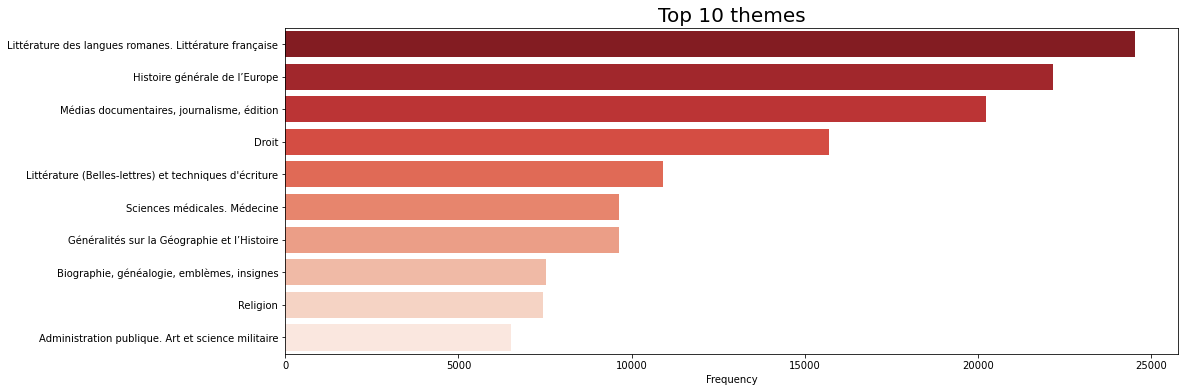

In [15]:
# get top 10 themes
theme_agg = collections.OrderedDict(interesting_aggregates["Theme_counter"][0].most_common(11))
temp = pd.DataFrame(data={ 'Frequency' : list(theme_agg.values())[1:]}, index = list(theme_agg.keys())[1:])
plt.figure(figsize=(16, 6))
g = sns.barplot(y=temp.index, x="Frequency", data=temp , palette="Reds_r")
g.set_title("Top 10 themes",fontsize=20)


In [ ]:
# get worst 10 themes
theme_agg = collections.OrderedDict(interesting_aggregates["Theme_counter"][0].most_common())
temp = pd.DataFrame(data={ 'Frequency' : list(theme_agg.values())[-10:][::-1]}, index = list(theme_agg.keys())[-10:][::-1])
plt.figure(figsize=(16, 6))
g = sns.barplot(y=temp.index, x="Frequency", data=temp , palette="Blues")
g.set_title("Least 10 themes",fontsize=20);


In [ ]:
# get top 10 languages
theme_agg = collections.OrderedDict(interesting_aggregates["Language_counter"][0].most_common(11))
values = list(theme_agg.values())
keys = list(theme_agg.keys())
keys.pop(1)
values.pop(1)

temp = pd.DataFrame(data={ 'Frequency' : values}, index = keys)
plt.figure(figsize=(16, 6))
g = sns.barplot(y=temp.index, x="Frequency", data=temp , palette="Reds_r")
g.set_title("Top 10 languages",fontsize=20);

In [ ]:
# get top 10 years
theme_agg = collections.OrderedDict(interesting_aggregates["Year_counter"][0].most_common(11))
temp = pd.DataFrame(data={ 'Frequency' : list(theme_agg.values())[1:]}, index = list(theme_agg.keys())[1:])
plt.figure(figsize=(16, 6))
g = sns.barplot(y=temp.index, x="Frequency", data=temp , palette="Reds_r")
g.set_title("Top 10 years",fontsize=20);

In [ ]:
# get top 10 years
theme_agg = collections.OrderedDict(interesting_aggregates["Century_counter"][0].most_common(11))
temp = pd.DataFrame(data={ 'Frequency' : list(theme_agg.values())}, index = list(theme_agg.keys()))
plt.figure(figsize=(16, 6))
g = sns.barplot(y=temp.index, x="Frequency", data=temp , palette="Reds_r")
g.set_title("Top 10 centuries",fontsize=20);

In [ ]:
## bins => regarder par décennie
## voir les documents les plus consultés de cette année

## Matrix chain representation


In [ ]:
## deveaud p21

## Markov chains

## Hitting time

## epsilon greedy simulation

## ergodicity ?

#### a) Themes

In [ ]:
transitions = df.apply(lambda x:  list(filter(lambda theme: theme != '',x['Theme'])) ,axis = 1)

In [ ]:
# dictionary of gallica themes, useful to interpret results from Gallica API queries
dewey_classification = {}
f = open("Data/dewey.txt", "r",encoding='utf-8')
for x in f:
    try:
        if(x[2:4]=='0 '):
            dewey_classification[x[0:2]]= x[4:].rstrip()
    except:
        continue
        
index_to_themes=dewey_classification

In [ ]:
deweys =list(itertools.combinations_with_replacement(dewey_classification.values(), 2))
fq = collections.defaultdict(int)

In [ ]:
# create empty dataframe with all 0s
df_themes_transition = pd.DataFrame(0, columns = dewey_classification.values(),index = dewey_classification.values())

In [ ]:
# increment according to frequency
for n in range(len(transitions)):
    for (i,j) in zip(transitions.iloc[n],transitions.iloc[n][1:]):
            df_themes_transition[i][j]=df_themes_transition[i][j]+1

In [ ]:
# divide by the sum to obtain a probability
df_themes_transition = df_themes_transition.div(df_themes_transition.sum(axis=1), axis=0)


In [ ]:
df_themes_transition_zoom = df_themes_transition[df_themes_transition.columns[-20:-10]].loc[df_themes_transition.columns[-20:-10]]
df_themes_transition_zoom

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_themes_transition_zoom, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True)
plt.title('Transition matrix zoomed on Litterature themes');
plt.savefig('themes_technology.png')


In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_themes_transition_zoom.T, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True)
plt.title('Transition matrix zoomed on Litterature themes');
plt.savefig('themes_technology.png')


In [ ]:
plt.figure(figsize=(30, 30))
plt.title("Transition matrix")
sns.heatmap(df_themes_transition, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True);


In [ ]:
plt.figure(figsize=(30, 30))
plt.title("Transition matrix transposed")
sns.heatmap(df_themes_transition.T, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True);


In [ ]:
## regarder là ou elle n'est pas symétrique
# un thème mène à un autre mais pas réciproquement

## thèmes qui sont plus propices que les autres à ramener à d'autre thème => distribution la plus uniforme (enlever staying in the same state pour avoir plus de relief sur les autres transitions) => comparer avec le social media graph => get super spreaders, comparer aux statistiques

#  association d'idées peut se faire avec un lien avec un document n-2 , n-3 => s, paralléliser

#  regarder longues sessions => matrices de transition, identifier bot crawler? séquence => matrice transition

## save first and last connection in timestamp => nombre de consultations/temps passé => >10000 , look at distribution. zoom on the tail end

## bins décennie

## color dewey themes by big themes

## Fadi el hage => retrouver des parcours napoléonienne

## => 4 juin

#### b) Languages

In [ ]:
transitions = df.apply(lambda x:  list(filter(lambda theme: theme != '',x['Language'])) ,axis = 1)


In [ ]:
# get all possible languages
theme_agg = collections.OrderedDict(interesting_aggregates["Language_counter"][0])
key = list(theme_agg.keys())
key.pop(1)

In [ ]:
# create empty dataframe with all 0s
dftemp = pd.DataFrame(0, columns = key,index = key)

In [ ]:
# increment according to frequency
for n in range(len(transitions)):
    for (i,j) in zip(transitions.iloc[n],transitions.iloc[n][1:]):
            dftemp[i][j]=dftemp[i][j]+1

In [ ]:
# divide by the sum to obtain a probability
dftemp = dftemp.div(dftemp.sum(axis=1), axis=0)

In [ ]:
dftemp_zoom = dftemp[['fre','ita','lat','dut','spa','Sans contenu linguistique']].loc[['fre','ita','lat','dut','spa','Sans contenu linguistique']]

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Language transition matrix heatmap _ zoomed on most frequent languages")
sns.heatmap(dftemp_zoom, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True);
plt.savefig('languages_mostfrequent_tmatrix.png')

In [ ]:
plt.figure(figsize=(20, 20))
plt.title("Language transition matrix heatmap")
sns.heatmap(dftemp, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True);

### c) Markov chain of memory 2

A Markov chain with memory (or a Markov chain of order m) where m is finite, is a process satisfying
\begin{aligned}{}&\Pr(X_{n}=x_{n}\mid X_{n-1}=x_{n-1},X_{n-2}=x_{n-2},\dots ,X_{1}=x_{1})\\=&\Pr(X_{n}=x_{n}\mid X_{n-1}=x_{n-1},X_{n-2}=x_{n-2},\dots ,X_{n-m}=x_{n-m}){\text{ for }}n>m\end{aligned} \begin{aligned}{}&\Pr(X_{n}=x_{n}\mid X_{n-1}=x_{n-1},X_{n-2}=x_{n-2},\dots ,X_{1}=x_{1})\\=&\Pr(X_{n}=x_{n}\mid X_{n-1}=x_{n-1},X_{n-2}=x_{n-2},\dots ,X_{n-m}=x_{n-m}){\text{ for }}n>m\end{aligned}
In other words, the future state depends on the past m states. It is possible to construct a chain Yn from Xn which has the 'classical' Markov property by taking as state space the ordered m-tuples of X values, i.e.,

\begin{aligned}{Y_{n}=\left(X_{n},X_{n-1},\ldots ,X_{n-m+1}\right)}.\end{aligned}

In [167]:
transitions = df.apply(lambda x:  list(filter(lambda theme: theme != '',x['Theme'])) ,axis = 1)

In [186]:
deweys_cartesian_2 =[p for p in itertools.product(dewey_classification.values(), repeat=2)]
fq = collections.defaultdict(int)

In [188]:
# create empty dataframe with all 0s
df_themes_transition = pd.DataFrame(0, columns = dewey_classification.values(),index = pd.MultiIndex.from_tuples(deweys_cartesian_2))

In [141]:
deweys =list(itertools.combinations_with_replacement(dewey_classification.values(), 3))
fq = collections.defaultdict(int)

In [190]:
# increment according to frequency
for n in range(len(transitions)):
    for (i,j,k) in zip(transitions.iloc[n],transitions.iloc[n][1:],transitions.iloc[n][2:]):
            df_themes_transition.loc[i,j][k]=df_themes_transition.loc[i,j][k]+1 

In [193]:
# divide by the sum to obtain a probability
df_themes_transition = df_themes_transition.div(df_themes_transition.sum(axis=1), axis=0)


In [199]:
df_themes_transition = df_themes_transition.fillna(0)

In [201]:
df_themes_transition.idxmax()

Généralités sur l’informatique, l’information, ouvrages généraux    (Généralités sur l’informatique, l’information...
Bibliographie                                                       (Encyclopédies générales, Théologie chrétienne...
Bibliothéconomie et Science de l'information                        (Philosophie et psychologie, Photographie et p...
Encyclopédies générales                                                           (Encyclopédies générales, Physique)
(Vacant)                                                            (Généralités sur l’informatique, l’information...
                                                                                          ...                        
Histoire générale de l’Asie. Orient. Extrême-Orient                 (Généralités sur l’informatique, l’information...
Histoire générale de l’Afrique                                      (Encyclopédies générales, Économie domestique ...
Histoire générale de l’Amérique du Nord                 

In [ ]:
# Réduire ces dimensionalités:
# sur toutes les combinaisons 

In [ ]:
plt.figure(figsize=(30, 30))
plt.title("Transition matrix")
sns.heatmap(df_themes_transition, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True);


## Word2vec + T-SNE representation

In [ ]:
## https://plotly.com/python/network-graphs/
## 

In [16]:
# get lists containing themes and century
def get_zipped_list(dataframe):
    # zip lists from theme column and century column
    temp = list(zip(dataframe['Theme'],list(map(str,dataframe['Century']))))
    
    # filter only by themes
    temp = list(filter(lambda e: e[0]!='',temp))
    
    # put everything in a string to construct our corpus
    temp = [" ".join(item) for item in temp]
    return temp

In [23]:
# get lists containing themes and century
def get_zipped_list(dataframe):
    # zip lists from theme column and century column
    temp = list(zip(dataframe['Theme']))
    
    # filter only by themes
    temp = list(filter(lambda e: e[0]!='',temp))
    
    # put everything in a string to construct our corpus
    temp = [" ".join(item) for item in temp]
    return temp

In [291]:
themes_decades = df.apply(lambda x: get_zipped_list(x),axis=1)

In [292]:
themes_decades

0        [Droit, Christianisme Théologie chrétienne, Re...
1        [Musique, Musique, Musique, Littérature des la...
2        [Technologie (Sciences appliquées), Médias doc...
3        [Publications en série d’ordre général, Économ...
4        [Loisirs et arts du spectacle. Sports, Médias ...
                               ...                        
20195    [Médias documentaires, journalisme, édition, D...
20196    [Histoire générale de l’Europe, Histoire génér...
20197                                                   []
20198    [Agronomie, agriculture et activités connexes,...
20199    [Biographie, généalogie, emblèmes, insignes, H...
Length: 20200, dtype: object

In [26]:
clean_themes = df.apply(lambda x:  list(filter(lambda theme: theme != '',x['Theme'])) ,axis = 1)

In [27]:
# Create the list of list format of the custom corpus for gensim modeling 
corpus = [row for row in themes_decades]

In [28]:
# view corpus
corpus[0]

['Droit',
 'Christianisme Théologie chrétienne',
 'Religion',
 'Loisirs et arts du spectacle. Sports',
 'Littérature des langues romanes. Littérature française',
 'Les arts. Beaux-arts et arts décoratifs',
 "Littérature (Belles-lettres) et techniques d'écriture",
 'Littérature des langues romanes. Littérature française',
 'Organisations générales et muséologie',
 'Bibliographie',
 'Littérature des langues romanes. Littérature française',
 "Littérature (Belles-lettres) et techniques d'écriture",
 "Littérature (Belles-lettres) et techniques d'écriture",
 'Littératures des langues helléniques. Littérature grecque classique',
 'Bibliographie',
 "Littérature (Belles-lettres) et techniques d'écriture",
 "Littérature (Belles-lettres) et techniques d'écriture",
 'Littérature des langues romanes. Littérature française',
 "Histoire générale du monde ancien, jusqu'à 499 apr. J.-C.",
 'Publications en série d’ordre général',
 'Médias documentaires, journalisme, édition',
 "Littérature (Belles-lett

In [29]:
len(corpus)

20200

In [30]:
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [83]:
model = Word2Vec(corpus, min_count=1,size= 400,workers=10, window =5, sg = 1)

In [84]:
# trying the model with one word
model.wv.most_similar('Bible')

[("Histoire et géographie du christianisme et de l'Église",
  0.7085192203521729),
 ('Littératures des autres langues', 0.6271653175354004),
 ('Langues germaniques. Allemand', 0.5915156602859497),
 ('Religion', 0.5890756845474243),
 ('Théologie morale et spirituelle chrétiennes', 0.5341112017631531),
 ('Sciences de la Terre', 0.5280137658119202),
 ('Italien, sarde, dalmate, roumain, langues rhéto-romanes',
  0.5203505754470825),
 ('Christianisme Théologie chrétienne', 0.5049454569816589),
 ('Épistémologie, causalité, genre humain', 0.4927102029323578),
 ('Théologie chrétienne et société et ecclésiologie', 0.478146493434906)]

In [85]:
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt
import matplotlib as mpl

vocab = list(model.wv.vocab)
X = model.wv[vocab]

tsne = TSNE(n_components=2,perplexity = 50)
X_tsne = tsne.fit_transform(X)
df1 = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])


In [86]:
import plotly.express as px

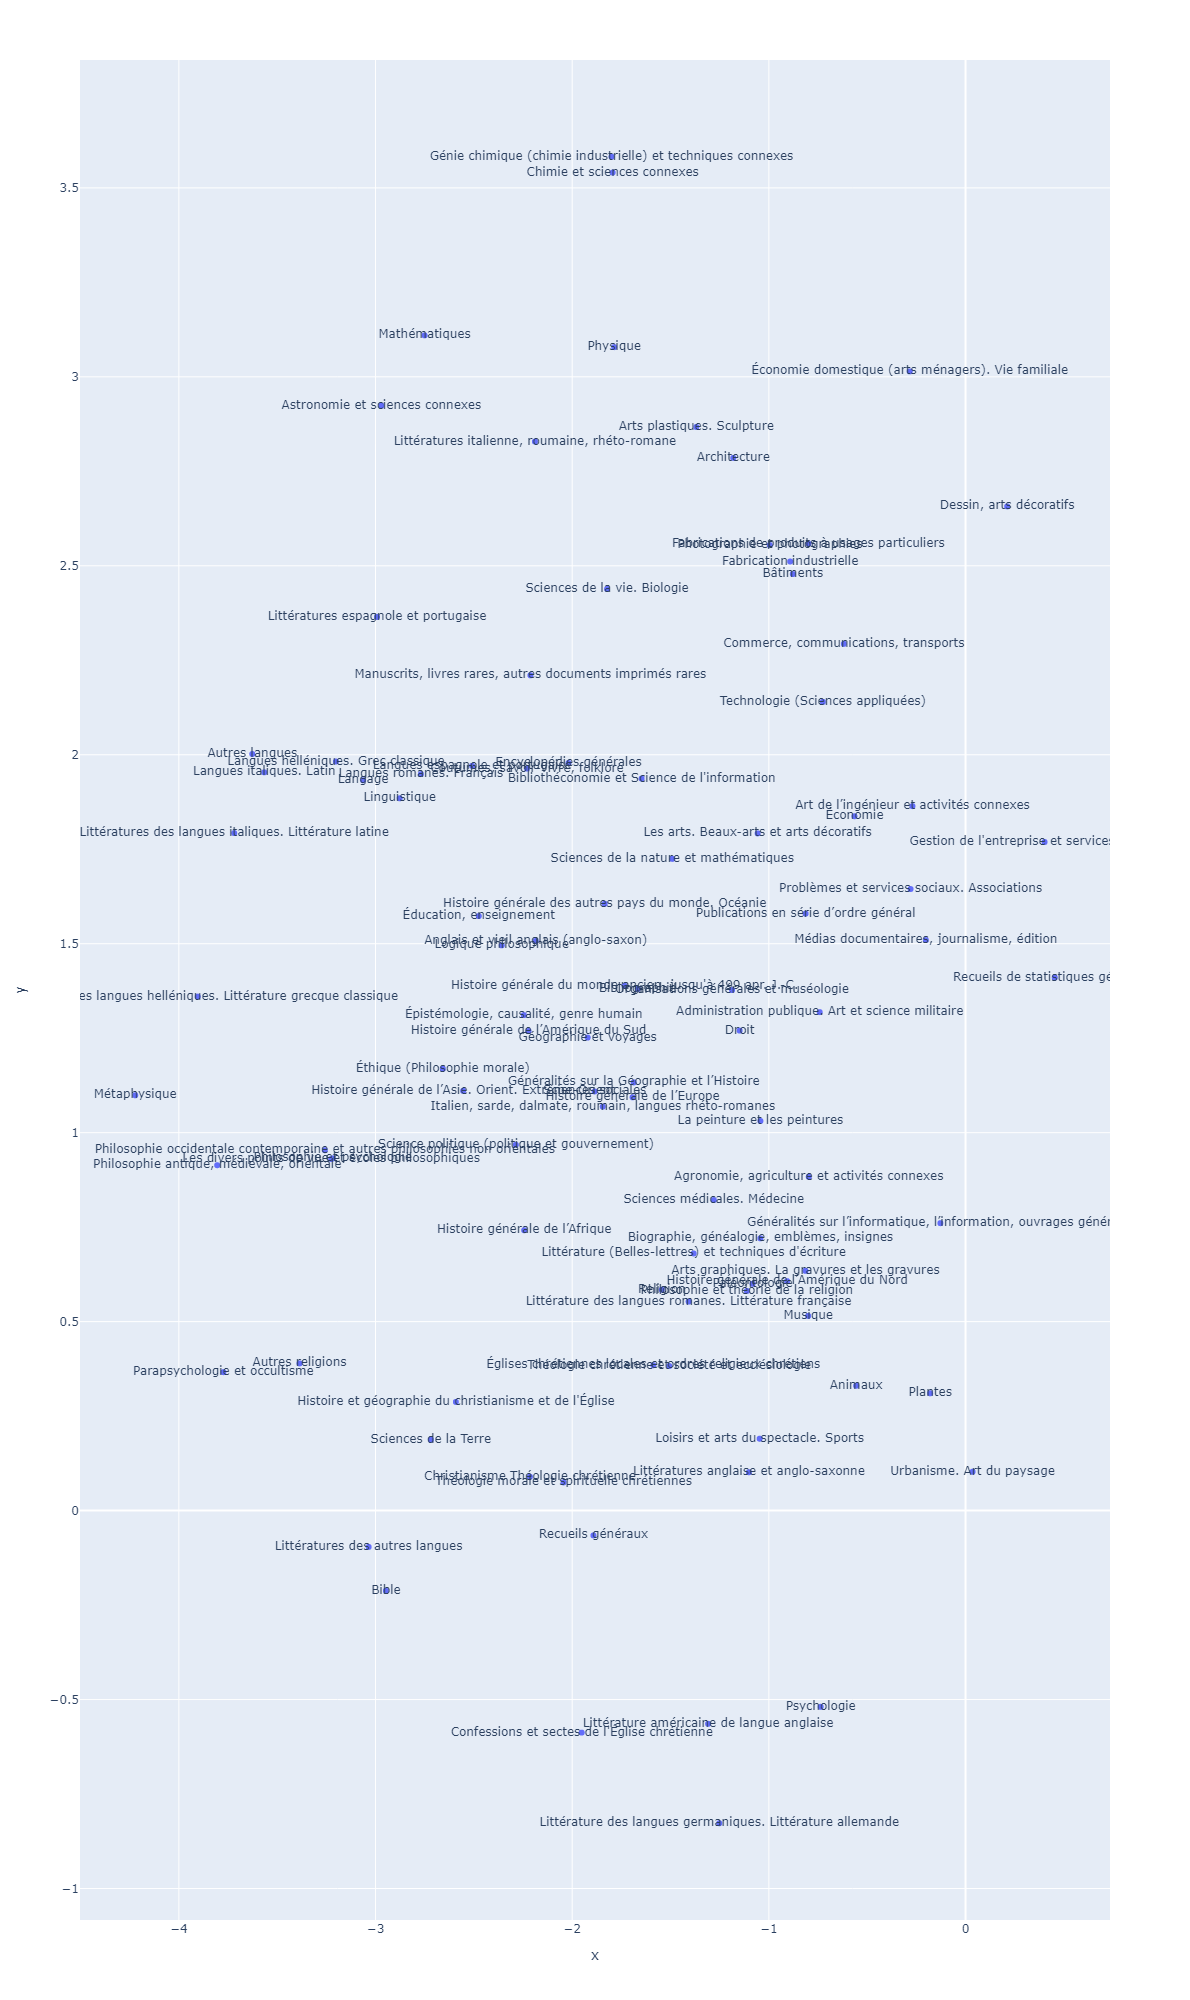

In [36]:
fig = px.scatter(x=df1['x'],y=df1['y'],text=df1.index, width=2000, height=2000)
fig.show()

### Disciplines ou il y'a une plus grande différence entre les siècles.

In [260]:
# create empty dataframe with all 0s
df_distances = pd.DataFrame(0.0, columns = vocab,index = vocab)

In [261]:
for i in range(len(vocab)):
    for j in range(len(vocab)):
        df_distances.loc[vocab[i]][vocab[j]] = np.linalg.norm(X[i]-X[j])

In [262]:
np.linalg.norm(X[3]-X[1])

2.3551693

In [272]:
df_distances.idxmax(axis=1)

Droit 19                                                                       Sciences médicales. Médecine 15
Christianisme Théologie chrétienne 20                                               Dessin, arts décoratifs 19
Religion 19                                                      Médias documentaires, journalisme, édition 17
Loisirs et arts du spectacle. Sports 19                                        Sciences médicales. Médecine 15
Littérature des langues romanes. Littérature française 19                      Sciences médicales. Médecine 15
                                                                                   ...                        
Astronomie et sciences connexes 15                                       Christianisme Théologie chrétienne 20
Sciences de la Terre 16                                                        Sciences médicales. Médecine 15
Recueils de statistiques générales 21                                          Sciences médicales. Médecine 15
P

## 

# Questions answered during the project

#### a) Themes that are more likely to lead to other themes

In [ ]:
## thèmes qui sont plus propices que les autres à ramener à d'autre thème => distribution la plus uniforme (enlever staying in the same state pour avoir plus de relief sur les autres transitions) 
## => comparer avec le social media graph => get super spreaders, comparer aux statistiques


##### a) 1) Robust transition matrix 
The colormap range is computed with robust quantiles instead of the extreme values.

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_themes_transition,robust=True, annot=False,xticklabels=True,fmt="f", cmap="YlGnBu", yticklabels=True)
plt.title('Transition matrix by dewey themes');

#### a) 2) first look at distribution 


In [ ]:
print("Most transitioned-to theme : ", df_themes_transition.mean(axis=1).idxmax(), " with ", df_themes_transition.mean(axis = 1 ).max() , "of probability of transition to on average")
# theme qui envoie le plus vers d'autres themes 
# différence significative

In [ ]:
df_themes_transition.sum(axis=1)

In [ ]:
print("Top 5 themes to reach from ", df_themes_transition.mean(axis=1).idxmax())
df_themes_transition.loc[df_themes_transition.mean(axis=1).idxmax()].sort_values(ascending = False)[:5]

In [ ]:
# looking at the first distribution besides 0 
df_themes_transition.iloc[0][(df_themes_transition.iloc[0]>0)].hist(bins = 100);
plt.title('Distribution of transitions for généralités sur linformatique')
plt.xlabel('Probability of transition')
plt.ylabel('nr of out ');

In [ ]:
print("Most transitioned from theme : ", df_themes_transition.median().idxmax(), " with ", df_themes_transition.median().max() )


In [ ]:
print("Top 5 themes to reach from ", df_themes_transition.median().idxmax())
df_themes_transition.loc[df_themes_transition.median().idxmax()].sort_values(ascending = False)[:5]

#### a) 3) Social media like representation

In [ ]:
import networkx as nx  # For the magic


In [ ]:
states = list(dewey_classification.values())
Q = df_themes_transition

In [ ]:
Q[states[0]][states[0]]

In [ ]:
G = nx.DiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[origin_state][destination_state]
        if rate > 0:
            G.add_edge(origin_state,
                       destination_state,
                       weight=rate,
                       label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)

In [ ]:
df_themes_transition['Génie chimique (chimie industrielle) et techniques connexes'].sort_values(ascending= False)

In [ ]:
# Position nodes using Fruchterman-Reingold force-directed algorithm.

# The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects,
# sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium.

plt.figure(figsize=(70,70))
node_size = 500
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.1)
nx.draw_networkx_labels(G, pos, font_weight=1.5)
plt.savefig('themes_network.png')
plt.axis('off');

In [ ]:
btw=nx.betweenness_centrality(G)

In [ ]:
print('Top 5 betweenness centrality')
sorted(btw.items(), key=lambda x: x[1], reverse = True )[:5]


In [ ]:
print('Least 5 betweenness centrality')
sorted(btw.items(), key=lambda x: x[1])[:5]


#### b) identify outliers, bot crawlers?

In [ ]:
from datetime import datetime


In [ ]:
def minutes_between(d1, d2):
    d1 = datetime.strptime(d1, "%d/%b/%Y:%H:%M:%S")
    d2 = datetime.strptime(d2, "%d/%b/%Y:%H:%M:%S")
    return abs(((d2 - d1)).total_seconds() // 60.0)

In [ ]:
df_2.iloc[0]['Date'][2:]

In [ ]:
sessions = pd.read_csv('SessionsApril2016from300to1000_clean.csv',engine='python',error_bad_lines=False)  
sessions.Ark = sessions.Ark.apply(literal_eval)
sessions.Date = sessions.Date.apply(literal_eval)

In [ ]:
sessions['session_length'] = temp.apply(lambda x : minutes_between(x[0][:-6],x[1][:-6]))

In [ ]:
sessions["len"]= sessions.apply(lambda x: len(x['Ark']),axis=1)


In [ ]:
sessions.sort_values(by = ['session_length'] , ascending = False)

In [ ]:
sessions['session_length'][(sessions['session_length']>3) & (sessions['session_length']<1000) ].hist(bins = 50);
plt.title('distribution of session lengths');

In [ ]:
# Zoom on the tail end 
sessions['session_length'][(sessions['session_length']>1000)].hist(bins = 50);
plt.title('distribution of session lengths - zoom on the tail end ');

In [ ]:
# statistics behind session length
sessions.session_length.describe()

In [ ]:
largest = pd.read_csv('largest_path.csv', index_col=0)

In [ ]:
largest
# transition matrix

# Clustering

In [ ]:

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(themes_decades, model=model)
len(vectorized_docs), len(vectorized_docs[0])

In [ ]:
def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [126]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=50,
    mb=500,
    print_silhouette_values=True,
)


For n_clusters = 50
Silhouette coefficient: 0.36
Inertia:6405.909805253717
Silhouette values:
    Cluster 4: Size:3929 | Avg:1.00 | Min:1.00 | Max: 1.00
    Cluster 48: Size:736 | Avg:1.00 | Min:1.00 | Max: 1.00
    Cluster 38: Size:129 | Avg:0.87 | Min:0.40 | Max: 0.93
    Cluster 49: Size:54 | Avg:0.83 | Min:0.24 | Max: 0.91
    Cluster 34: Size:65 | Avg:0.79 | Min:0.12 | Max: 0.89
    Cluster 39: Size:119 | Avg:0.70 | Min:0.09 | Max: 0.84
    Cluster 12: Size:484 | Avg:0.64 | Min:0.07 | Max: 0.81
    Cluster 43: Size:56 | Avg:0.62 | Min:0.03 | Max: 0.80
    Cluster 25: Size:51 | Avg:0.60 | Min:0.00 | Max: 0.81
    Cluster 27: Size:582 | Avg:0.59 | Min:0.06 | Max: 0.77
    Cluster 23: Size:910 | Avg:0.58 | Min:0.05 | Max: 0.75
    Cluster 40: Size:101 | Avg:0.56 | Min:0.02 | Max: 0.76
    Cluster 24: Size:77 | Avg:0.54 | Min:0.11 | Max: 0.74
    Cluster 19: Size:157 | Avg:0.52 | Min:0.01 | Max: 0.73
    Cluster 41: Size:249 | Avg:0.45 | Min:0.02 | Max: 0.65
    Cluster 16: Size:75 | 

In [127]:
print("Most representative terms per cluster (based on centroids):")
for i in range(50):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=3)
    for t in most_representative:
        tokens_per_cluster += "|| "+f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: || Physique || Mathématiques || Technologie (Sciences appliquées) 
Cluster 1: || Littérature (Belles-lettres) et techniques d'écriture || Littérature des langues romanes. Littérature française || Littérature américaine de langue anglaise 
Cluster 2: || Publications en série d’ordre général || Italien, sarde, dalmate, roumain, langues rhéto-romanes || Langues germaniques. Allemand 
Cluster 3: || Littérature des langues romanes. Littérature française || Littérature (Belles-lettres) et techniques d'écriture || Littérature américaine de langue anglaise 
Cluster 4: || Économie domestique (arts ménagers). Vie familiale || Recueils de statistiques générales || Philosophie et théorie de la religion 
Cluster 5: || Histoire générale de l’Europe || Italien, sarde, dalmate, roumain, langues rhéto-romanes || Médias documentaires, journalisme, édition 
Cluster 6: || Médias documentaires, journalisme, édition || Gestion de l'entre

In [128]:
df_clusters = pd.DataFrame({
    "text": themes_decades,
    "cluster": cluster_labels
})

## Topological Data Analysis - Experiments and preliminary results

#### 1. Preparing the data

In [334]:
# Get rid of empty paths
themes_decades_2 = themes_decades[themes_decades.map(lambda d: len(d)) > 0]


In [335]:
# Change paths from themes to vectors
def create_2dpath_from_word2vec_tsne(path):
    path_temp = []
    for p in path:
        path_temp.append(list(df1.loc[p]))
    return np.array(path_temp)

paths_2d = themes_decades_2.apply(lambda x: create_2dpath_from_word2vec_tsne(x))
        

In [336]:
# Test TDA on 1000 points
point_clouds_basic = paths_2d

In [337]:
point_clouds_basic

0        [[62.747982025146484, -0.5673372745513916], [1...
1        [[-44.28729248046875, -44.149147033691406], [-...
2        [[-68.47440338134766, -26.168432235717773], [-...
3        [[77.94551849365234, 15.16433334350586], [72.0...
4        [[-19.691219329833984, -64.27169036865234], [-...
                               ...                        
20193    [[10.108468055725098, -23.945377349853516], [1...
20195    [[-4.2365312576293945, -83.35711669921875], [6...
20196    [[10.108468055725098, -23.945377349853516], [1...
20198    [[-16.41602325439453, -42.923439025878906], [-...
20199    [[-30.008235931396484, -42.566226959228516], [...
Length: 16271, dtype: object

#### 2. Generate persistance diagrams

In [348]:
from gtda.homology import VietorisRipsPersistence

# Track connected components, loops, and voids ---- betty numbers
homology_dimensions = [0, 1]

# Collapse edges to speed up H2 persistence calculation!
persistence = VietorisRipsPersistence(
    metric="euclidean",
    homology_dimensions=homology_dimensions,
    n_jobs=6,
    collapse_edges=True,
)

diagrams_basic = persistence.fit_transform(list(point_clouds_basic))

#### 3. "Vectorize" persistence diagrams via embeddings or kernels which are well-suited for machine learning

calculate a vector of amplitudes for each persistence diagram. Here the main idea is to partition a diagram into subdiagrams (one per homology dimension) and use a metric to calculate the amplitude of each subdiagram relative to the trivial diagram (i.e. the one with points on the main diagonal). The result is a vector $\boldsymbol{a} = (a_{q_1}, \ldots, a_{q_n})$, where the $q_i$ range over the specified homology dimension

source: https://github.com/giotto-ai/giotto-tda/blob/master/examples/classifying_shapes.ipynb

##### 3.1 Basic vectors

In [353]:
from gtda.diagrams import PersistenceEntropy

persistence_entropy = PersistenceEntropy()

# calculate topological feature matrix
X_basic = persistence_entropy.fit_transform(diagrams_basic)

# expect shape - (n_point_clouds, n_homology_dims)
X_basic.shape

(16271, 2)

Representation of paths according to persistence diagram


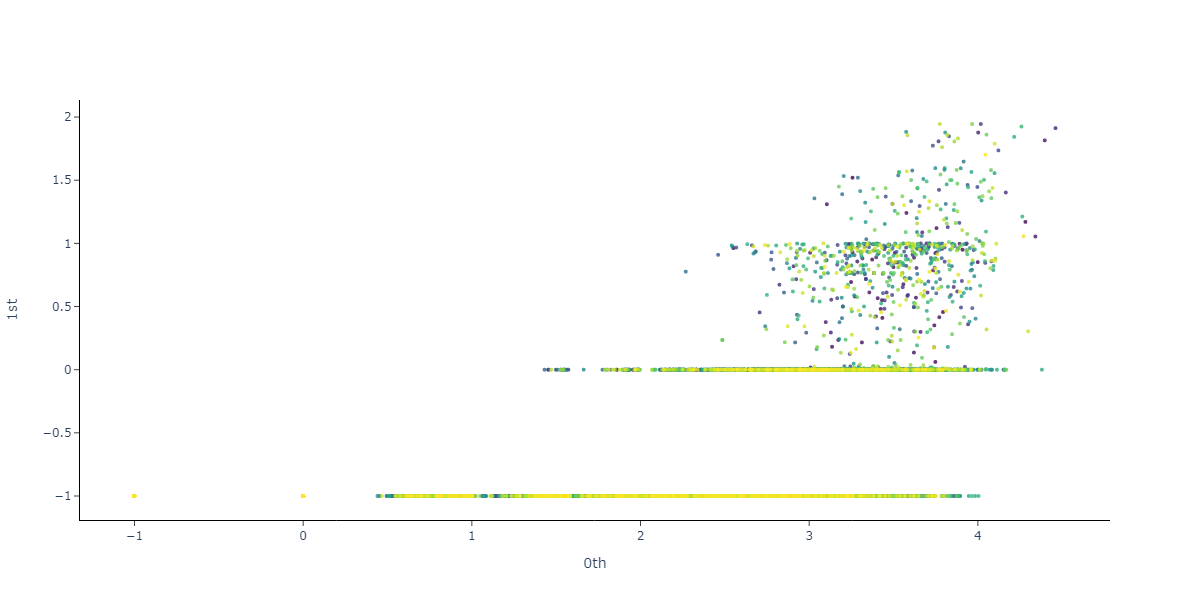

In [357]:
print('Representation of paths according to persistence diagram');
plot_point_cloud(X_basic)


##### 3.2 Advanced vectors

In [359]:
from sklearn.pipeline import make_union

# Select a variety of metrics to calculate amplitudes
metrics = [
    {"metric": metric}
    for metric in ["bottleneck", "wasserstein", "landscape", "persistence_image"]
]

# Concatenate to generate 3 + 3 + (4 x 3) = 18 topological features
feature_union = make_union(
    PersistenceEntropy(normalize=True),
    NumberOfPoints(n_jobs=-1),
    *[Amplitude(**metric, n_jobs=-1) for metric in metrics]
)

In [360]:
X_advanced = feature_union.fit_transform(diagrams_basic)

In [361]:
X_advanced.shape

(16271, 12)

Representation of paths according to persistence diagram


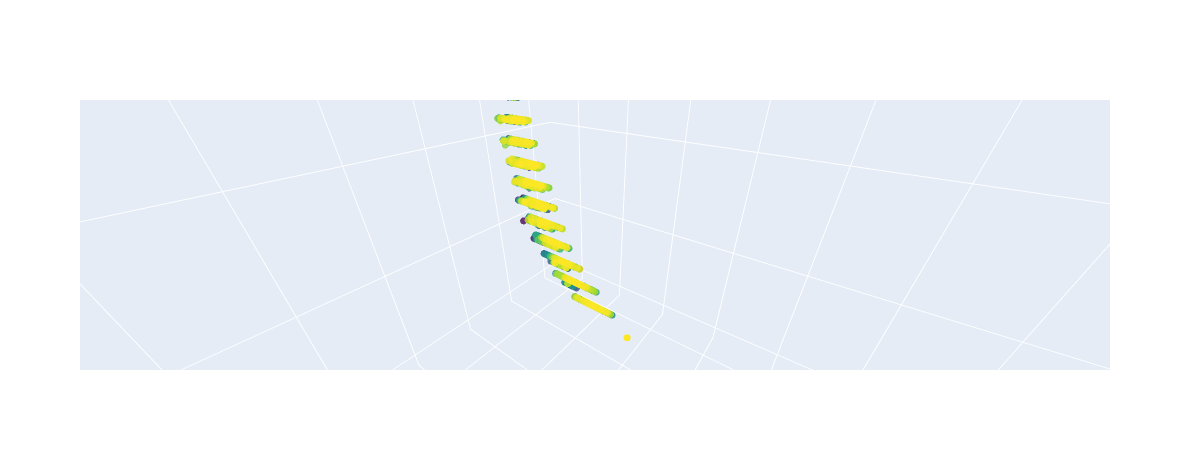

In [366]:
print('Representation of paths according to persistence diagram')
plot_point_cloud(X_advanced)

#### 4. Create clusters

##### 4.1 Cluster based on basic vectors

In [396]:
clustering, cluster_labels = mbkmeans_clusters(
	X=X_basic,
    k=10,
    mb=500,
    print_silhouette_values=True,
)

For n_clusters = 10
Silhouette coefficient: 0.70
Inertia:551.8226988127117
Silhouette values:
    Cluster 0: Size:3315 | Avg:1.00 | Min:1.00 | Max: 1.00
    Cluster 6: Size:1914 | Avg:1.00 | Min:0.06 | Max: 1.00
    Cluster 2: Size:1563 | Avg:0.78 | Min:-0.00 | Max: 0.86
    Cluster 9: Size:763 | Avg:0.57 | Min:0.09 | Max: 0.71
    Cluster 1: Size:1955 | Avg:0.54 | Min:-0.09 | Max: 0.76
    Cluster 8: Size:1858 | Avg:0.53 | Min:-0.01 | Max: 0.75
    Cluster 3: Size:827 | Avg:0.52 | Min:0.02 | Max: 0.68
    Cluster 4: Size:1928 | Avg:0.50 | Min:-0.03 | Max: 0.74
    Cluster 7: Size:1555 | Avg:0.49 | Min:-0.08 | Max: 0.68
    Cluster 5: Size:593 | Avg:0.47 | Min:-0.08 | Max: 0.63


In [397]:
df_tda_clusters = pd.DataFrame({
    "text": themes_decades_2,
    "cluster": cluster_labels
})